<a href="https://colab.research.google.com/github/XiscoMesquida/Python/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import scipy as sc 
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles




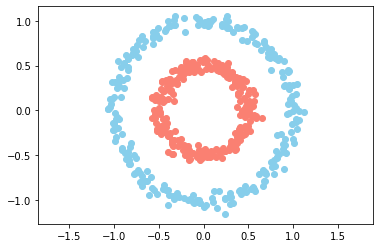

In [6]:
#Dataset

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise = 0.05)

Y = Y[:,np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0],X[Y[:, 0] == 0, 1], c="skyblue" )
plt.scatter(X[Y[:, 0] == 1, 0],X[Y[:, 0] == 1, 1], c="salmon" )
plt.axis("equal")
plt.show()

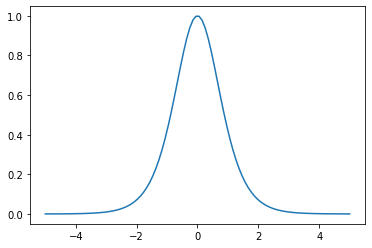

In [22]:
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
        
    self.b = np.random.rand(1, n_neur)*2-1
    self.W = np.random.rand(n_conn, n_neur)*2-1

 
#Funciones de activación

#NOTA 1: Las simulaciones en el playground de Tensorflow  demuestran que funciona mejor
# con la función de tanh.

tanh = (lambda x : ((np.e**x)-(np.e**(-x)))/((np.e**x)+(np.e**(-x))),
        lambda x : 4/((((np.e**x)+(np.e**(-x))))**2))

_x = np.linspace(-5,5, 100)
plt.plot(_x, tanh[1](_x))

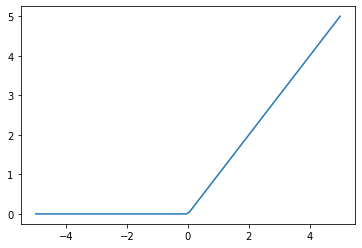

In [23]:
ReLu = lambda x : np.maximum(0,x)
_x = np.linspace(-5,5, 100)
plt.plot(_x, ReLu(_x))

In [24]:
l0 = neural_layer(n_conn = p, n_neur = 4 , act_f = tanh) #capa de entrada
l1 = neural_layer(n_conn = 4, n_neur = 8 , act_f = tanh) #1er capa oculta
topology = [p, 4, 8, 1]

def create_nn(topology, act_f):
  nn = []
  
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn


In [25]:
topology = [p, 4, 8, 1] #Mapa neuronal


neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp -Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))#error cuadrático medio


#Función de entrenamiento
def train(neural_net, X, Y, f_cost,lr=0.5,train=True):
  out=[(None,X)] # En este array guarda los pares de z y a [(z0,a0),(z1,a1),...]
  
  #1. Propagación hacia adelante.
  for l, layer in enumerate(neural_net):
    
    z = np.dot(out[-1][1],neural_net[l].W) + neural_net[l].b
    a = neural_net[l].act_f[0](z)
   
    out.append((z,a))

  #2. Backpropagation and Gradient descent
  
  if train:
    delta=[]
    
    for l in reversed(range(0,len(neural_net))):
      z=out[l+1][0]
      a=out[l+1][1]
      
      #Si estamos en la ultima capa
      if l == len(neural_net) - 1:
        delta.insert(0, f_cost[1](a, Y) * neural_net[l].act_f[1](a))
      #Calculamos delta en las capas previas
      else:
        delta.insert(0,np.dot(delta[0],aux_w.T) * neural_net[l].act_f[1](a)) 
          
      aux_w=neural_net[l].W 
      #Lo guardamos en una variable auxiliar para poder modificar los valores al mismo tiempo usando el Gradiente descendente
          
      #Gradient Descent : Ajuste de la matriz de pesos y el valor del vector sesgo.
      neural_net[l].b = neural_net[l].b - lr * np.mean(delta[0], axis=0, keepdims=True)
      neural_net[l].W = neural_net[l].W - np.dot(out[l][1].T,delta[0])*lr
          
  return out[-1][1]


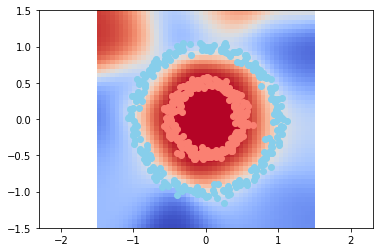

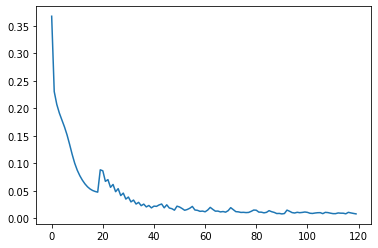

In [26]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, tanh)
loss = []

for i in range(3000):
    
  #Entrenamos la red:
  pY = train(neural_n, X, Y, l2_cost, lr = 0.001)

  if i%25 == 0:
  
    loss.append(l2_cost[0](pY,Y))
    res = 50
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
        
    _Y = np.zeros((res, res))
        
    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0,x1]]), Y, l2_cost,train=False)[0][0]

    #Visualizamos los resultados del entrenamiento.

    plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c = "skyblue" )
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c = "salmon" )

    clear_output(wait = True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)
